<a href="https://colab.research.google.com/github/lazarogibert/Tesis/blob/main/transfer_load_Neural_network_HLCM_keras_all_net_early_stopping_and_functional_keras_all_dataset_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing and importring libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#feature engine
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 5.8 MB/s eta 0:00:00


In [3]:
!pip install plotly

In [4]:
!pip install skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.3/221.3 kB 4.5 MB/s eta 0:00:00


In [70]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from scipy.io import arff
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas import DataFrame
#import miceforest as mf
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from feature_engine.imputation import RandomSampleImputer
import seaborn as sns
# Clasificacion
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
import multiprocessing
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import ndcg_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from skorch import NeuralNetBinaryClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras import layers

#Getting the datset

In [7]:
df = pd.read_csv('/content/sample_data/BaseAnon.csv')
df.head()

,REDCap ID,Fecha de Nacimiento,Edad actual Última edad registrada en caso de exitus,Género,Hospital de Origen,Hospital Origen 1 Otro,Hospital de Origen.1,Hospital de Origen.2,Previsión,Otra previsión,...,Tratamiento EICH crónico (choice=Budesonida Inhalatoria).3,Tratamiento EICH crónico (choice=Ciclosporina (CsA)).3,Tratamiento EICH crónico (choice=Tacrolimus).3,Tratamiento EICH crónico (choice=Micofelonato (MMF)).3,Tratamiento EICH crónico (choice=MTP).3,Tratamiento EICH crónico (choice=Metotrexato (MTX)).3,Tratamiento EICH crónico (choice=Prednisona).3,Tratamiento EICH crónico (choice=Rapamicina).3,Tratamiento EICH crónico (choice=Otros).3,Otros tratamientos EICH crónico.3
0,1,10/15/1992,7.83,Femenino,Hospital Luis Calvo Mackenna (HLCM),NaN,NaN,NaN,Fonasa A,NaN,...,0,0,0,0,0,0,0,0,0,NaN
1,2,6/23/1989,33.55,Masculino,Hospital Exequiel González Cortés (HEGC),NaN,NaN,NaN,Fonasa A,NaN,...,0,0,0,0,0,0,1,0,0,NaN
2,3,5/11/1997,25.67,Masculino,Hospital Luis Calvo Mackenna (HLCM),NaN,NaN,NaN,Fonasa A,NaN,...,0,0,0,0,0,0,0,0,0,NaN
3,4,4/8/1983,39.76,Masculino,Hospital San Juan de Dios (HSJDD),NaN,NaN,NaN,Fonasa D,NaN,...,0,1,0,0,0,0,1,0,0,NaN
4,5,9/12/1997,25.33,Masculino,Hospital Exequiel González Cortés (HEGC),NaN,NaN,NaN,Fonasa B,NaN,...,0,0,0,0,0,0,0,0,0,NaN


#Distribution of the classes

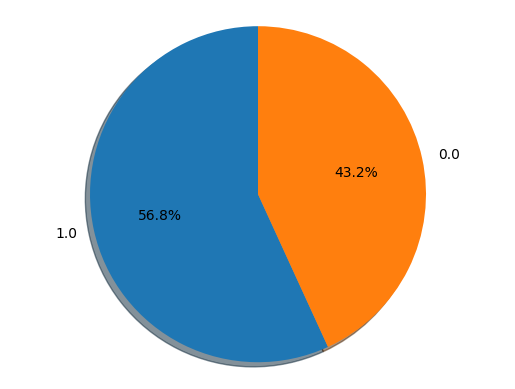

In [8]:
#Decision class distribution
groups = df['Eich Agudo.1'].value_counts()
sizes = [groups[1], groups[0]]
labels = list(map(lambda e: str(e), groups.index))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [9]:
print(groups)

1.0    295
0.0    224
Name: Eich Agudo.1, dtype: int64


#Selecting Features

In [10]:
df= df[df['Tipo de trasplante'] == 'Alogénico']

In [11]:
df=df.drop(['Fecha de Nacimiento','Hospital de Origen','Otra previsión','Fecha de Diagnóstico','Diagnóstico 2','Otros diagnósticos.1','Tipo de Leucemia Linfoblástica Aguda','Obs de diagnóstico','Fecha de recaída pretrasplante',
            'Otra traslocación','CMN/Kg × 107','CNT/Kg × 107','CD34/Kg × 105','UFC/Kg × 104','UFC/Kg × 104.1','Grupo Sanguíneo Donante 2','Factor Rh.2','Fuente de PH.1','CNT/Kg × 107.5','CD34/Kg × 105.5','Fecha de ingreso',
            'Otros tratamientos','Dosis de Ciclofosfamida','Dosis Irradiación Corporal Total','Dosis Irradiación Nodal Total','Otros medicamentos/tratamientos para profilaxis','Fecha del TMO','Edad actual Última edad registrada en caso de exitus'
            ,'Fecha del alta','Fecha Falla Implante Secundaria','Fecha de recaída','Fecha de recaída 2','REDCap ID','Fecha de reactivación 1','Fecha de reactivación 2', 'Fecha de reactivación 3','Fecha de reactivación 4' ,'Fecha de reactivación 5'
            ,'Tipo de trasplante','t(12;21)','Recaída 2','Previsión','Recaída Pretrasplante','CD3/Kg × 105.5','El paciente es dado de alta','Falla de Implante','Recaída','Recaída 2','Número de Remisión Completa'], axis=1)



df=df.drop(df.loc[:,'Hospital Origen 1 Otro':'Hospital de Origen.2'].columns, axis=1)
df=df.drop(df.loc[:,'Exitus':'Fecha enfermedad CMV 1'].columns, axis=1)

df=df.drop(df.loc[:,'Cutáneo.1':'Otros tratamientos EICH crónico.3'].columns, axis=1)

In [12]:
df.rename(columns={"Factor Rh.1":"Factor Rh1"},inplace=True)

In [13]:
df = df.dropna(subset=['Eich Agudo.1'])

In [14]:
df.shape

(438, 51)

## Final Distribution of the classes

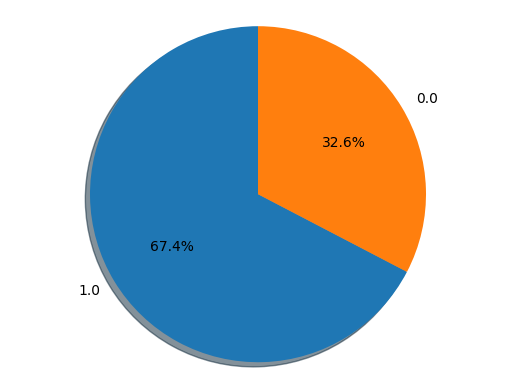

In [15]:
#Decision class distribution
groups = df['Eich Agudo.1'].value_counts()
sizes = [groups[1], groups[0]]
labels = list(map(lambda e: str(e), groups.index))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [16]:
print(groups)

1.0    295
0.0    143
Name: Eich Agudo.1, dtype: int64


#Preproces the datasets

In [17]:
#df = df.loc[df['Fuente de PH']!='SCU']
#df = df.loc[df['Diagnóstico 1']!='SMD']
#dftest = df.loc[df['Diagnóstico 1']!='Mielodisplasia']

In [18]:
df.rename(columns={'Edad de TPH':'recipient_age','Grupo Sanguíneo Donante':'donor_ABO','CMV Donante':'donor_CMV','Género':'recipient_gender'
,'Grupo Sanguíneo Paciente':'recipient_ABO','Factor Rh':'recipient_rh','CMV':'recipient_CMV','Diagnóstico 1':'disease','Tipo de diagnóstico':'disease_group',
'Tipo de Compatibilidad del Donante':'HLA_mismatch','Fuente de PH':'stem_cell_source','CD34/Kg × 106':'CD34_x1e6_per_kg','Eich Agudo.1':'acute_GvHD_II_III_IV'},inplace=True)

In [19]:
compatibility={
   'HLA_mismatch':{"MSD":"matched","MD no relacionado":"matched","MFD":"matched","MMD/MMFD":"mismatched"},
   'donor_ABO':{"O":"0"},
   'donor_CMV':{1:"present",0:"absent"},
   'recipient_gender':{"Masculino":"male","Femenino":"female" },
   'recipient_ABO':{"O":"0"},
   'recipient_rh':{1:"plus",0:"minus"},
   'recipient_CMV':{1:"present",0:"absent"},
   'disease':{"LLA":"ALL","LMA M4":"AML","LMA M":"AML","LMA M0":"AML","LMA M1":"AML","LMA M2":"AML","LMA M3":"AML","LMA M5":"AML",
              "LMA M6":"AML","LMA M7":"AML","Adrenoleucodistrofia":"nonmalignant","AMS":"nonmalignant","Anemia Fanconi":"nonmalignant",
              "Blackfan Diamond":"nonmalignant","Chediak Higashi":"nonmalignant","Deficiencia del XIAP":"nonmalignant",
              "Epidermolisis Bulosa":"nonmalignant","IDP":"nonmalignant","Inmunodeficiencia primaria":"nonmalignant","LAD":"nonmalignant",
              "Leaky SCID":"nonmalignant","Linfohistiocitosis":"nonmalignant","Neutopenia congenita":"nonmalignant",
              "Neutropenia Kostman":"nonmalignant","Osteopetrosis":"nonmalignant","SCID":"nonmalignant",
              "Sindrome Linfoproliferativo autoinmune":"nonmalignant","Trombocitopenia amegacariocítica":"nonmalignant","WAS":"nonmalignant",
              "LALA":"ALL","Leucemia del lactante":"ALL","LMC":"chronic","LMMJ":"AML",},
   'disease_group':{"No oncológico":"nonmalignant","Oncológico":"malignant"},
   'stem_cell_source':{"MO":"bone_marrow","SP":"peripheral_blood"}
}

df = df.replace(compatibility)

In [20]:
df=df.fillna({"Presenta traslocación genética":0,"t(9;22)":0,"(11q23) anormales":0,"t(4;11)":0,"Otras traslocaciones":0})

In [21]:
obj_cols=df.select_dtypes(include=['object']).columns.to_list()

In [22]:
df[obj_cols]=df[obj_cols].astype('category')

In [23]:
cat_cols=df.select_dtypes(include=['category']).columns.to_list()

In [24]:
X=df.drop(['acute_GvHD_II_III_IV'],axis=1)
y=df['acute_GvHD_II_III_IV']

In [25]:
numeric_cols=X.select_dtypes(include=['float64', 'int']).columns.to_list()

In [26]:
transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough',
    verbose_feature_names_out=False)

transformed = transformer.fit_transform(X)
#temp=transformed.to_numpy()
#transformed=transformed.toarray()
#print(transformed)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [27]:
transformed_df.head()

,recipient_gender_female,recipient_gender_male,recipient_gender_nan,recipient_ABO_0,recipient_ABO_A,recipient_ABO_AB,recipient_ABO_B,recipient_ABO_nan,recipient_rh_minus,recipient_rh_plus,...,Profilaxis (choice=Ciclosporina (CsA)),Profilaxis (choice=Depleción de Linfocitos T (DLT)),"Profilaxis (choice=Metilprednisolona (MP, MTP))",Profilaxis (choice=Metotrexato (MTX)),"Profilaxis (choice=Micofelonato (MMF, MFN))","Profilaxis (choice=Prednisona (PDN, Pred))",Profilaxis (choice=Rapamicina),"Profilaxis (choice=Tacrolimus (FK, FK506))",Profilaxis (choice=Otros),recipient_age
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.29
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.79
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.88
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.55
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53


In [28]:
print(transformed_df.columns.to_list())

['recipient_gender_female', 'recipient_gender_male', 'recipient_gender_nan', 'recipient_ABO_0', 'recipient_ABO_A', 'recipient_ABO_AB', 'recipient_ABO_B', 'recipient_ABO_nan', 'recipient_rh_minus', 'recipient_rh_plus', 'recipient_rh_nan', 'recipient_CMV_absent', 'recipient_CMV_present', 'recipient_CMV_nan', 'disease_ALL', 'disease_AML', 'disease_Mielodisplasia', 'disease_SMD', 'disease_chronic', 'disease_nonmalignant', 'disease_group_malignant', 'disease_group_nonmalignant', 'disease_group_nan', 'Sexo Donante_Femenino', 'Sexo Donante_Masculino', 'Sexo Donante_nan', 'HLA_mismatch_matched', 'HLA_mismatch_mismatched', 'donor_ABO_0', 'donor_ABO_A', 'donor_ABO_AB', 'donor_ABO_B', 'donor_ABO_nan', 'donor_CMV_absent', 'donor_CMV_present', 'donor_CMV_nan', 'stem_cell_source_SCU', 'stem_cell_source_bone_marrow', 'stem_cell_source_peripheral_blood', 'stem_cell_source_nan', 'Segundo TPH', 'Presenta traslocación genética', 't(9;22)', '(11q23) anormales', 't(4;11)', 'Otras traslocaciones', 'Factor R

In [29]:
X=transformed_df.drop(['donor_ABO_nan', 'donor_CMV_nan','recipient_gender_nan','recipient_ABO_nan','recipient_rh_nan',
                             'recipient_CMV_nan','disease_group_nan',
                             'stem_cell_source_nan','Sexo Donante_nan'],axis=1)

In [30]:
X.shape

(438, 70)

##Imputatition

In [31]:
rf=RandomForestRegressor()
lr=LinearRegression()
imputer = IterativeImputer(estimator=rf,random_state=100, max_iter=30)

In [32]:
df_train=X.loc[:, ['CD34_x1e6_per_kg',"recipient_age","CNT/Kg × 108", "CMN/Kg × 108"]]

In [33]:
imputer.fit(df_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=RandomForestRegressor(), max_iter=30,
                 random_state=100)

In [34]:
df_imputed = imputer.transform(df_train)

In [35]:
X.loc[:, ['CD34_x1e6_per_kg',"recipient_age","CNT/Kg × 108", "CMN/Kg × 108"]]=df_imputed

In [36]:
X.head()

,recipient_gender_female,recipient_gender_male,recipient_ABO_0,recipient_ABO_A,recipient_ABO_AB,recipient_ABO_B,recipient_rh_minus,recipient_rh_plus,recipient_CMV_absent,recipient_CMV_present,...,Profilaxis (choice=Ciclosporina (CsA)),Profilaxis (choice=Depleción de Linfocitos T (DLT)),"Profilaxis (choice=Metilprednisolona (MP, MTP))",Profilaxis (choice=Metotrexato (MTX)),"Profilaxis (choice=Micofelonato (MMF, MFN))","Profilaxis (choice=Prednisona (PDN, Pred))",Profilaxis (choice=Rapamicina),"Profilaxis (choice=Tacrolimus (FK, FK506))",Profilaxis (choice=Otros),recipient_age
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.29
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.79
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.88
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.55
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.53


In [37]:
rfc=RandomForestClassifier(random_state=0)
lgr=LogisticRegression()
imputerbinary = IterativeImputer(estimator=rfc,random_state=100, max_iter=15)

In [38]:
xtemp=X.drop( ['CD34_x1e6_per_kg',"recipient_age","CNT/Kg × 108", "CMN/Kg × 108"],axis=1)
binarycols=xtemp.columns.to_list()
df_train_binary=xtemp

In [39]:
imputerbinary.fit(df_train_binary)

IterativeImputer(estimator=RandomForestClassifier(random_state=0), max_iter=15,
                 random_state=100)

In [40]:
df_imputed_binary = imputerbinary.transform(df_train_binary)

In [41]:
X[binarycols]=df_imputed_binary

In [42]:
print(X.isnull().sum())

recipient_gender_female                       0
recipient_gender_male                         0
recipient_ABO_0                               0
recipient_ABO_A                               0
recipient_ABO_AB                              0
                                             ..
Profilaxis (choice=Prednisona (PDN, Pred))    0
Profilaxis (choice=Rapamicina)                0
Profilaxis (choice=Tacrolimus (FK, FK506))    0
Profilaxis (choice=Otros)                     0
recipient_age                                 0
Length: 70, dtype: int64


#Splitting test and train sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16,stratify=y)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=16,stratify=y_train) # 0.25 x 0.8 = 0.2

In [45]:
X_train.shape

(262, 70)

In [46]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    262.000000
mean       0.675573
std        0.469057
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: acute_GvHD_II_III_IV, dtype: float64


In [47]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    88.000000
mean      0.670455
std       0.472742
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: acute_GvHD_II_III_IV, dtype: float64


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.fit_transform(X_val)

In [49]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


#Neural network

##Neural network implemetation

In [50]:
!pip install scikeras

In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight
import scikeras

# Loading Model

In [71]:
from scikeras.wrappers import KerasClassifier
# Load the model back into memory
new_classifier_model = keras.models.load_model("/content/drive/MyDrive/Proyecto de Tesis Lazaro Gibert/BMT29vfunctional-all-dataset")
# Now we need to instantiate a new SciKeras object
# since we only saved the Keras model
#classifier_new = KerasClassifier(new_classifier_model, random_state=0)
# use initialize to avoid re-fitting
#classifier_new.fit(X_train,y_train,class_weight=class_weights2,epochs=250)
#pred_new = classifier_new.predict(X_test)
#np.testing.assert_allclose(pred_old, pred_new)

In [72]:
print("weights:", len(new_classifier_model.weights))
print("trainable_weights:", len(new_classifier_model.trainable_weights))
print("non_trainable_weights:", len(new_classifier_model.non_trainable_weights))

weights: 4
trainable_weights: 4
non_trainable_weights: 0


In [73]:
new_classifier_model.layers

In [74]:
new_classifier_model.summary()

Model: "model_312"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_313 (InputLayer)      [(None, 29)]              0         
                                                                 
 dense_1819 (Dense)          (None, 64)                1920      
                                                                 
 dense_1820 (Dense)          (None, 1)                 65        
                                                                 
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


In [221]:
inputs = keras.Input(shape=(70,))
dense = layers.Dense(29, activation="relu")(inputs)
layer=new_classifier_model(dense)
model = keras.Model(inputs=inputs, outputs=layer)

In [222]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 70)]              0         
                                                                 
 dense_16 (Dense)            (None, 29)                2059      
                                                                 
 model_312 (Functional)      (None, 1)                 1985      
                                                                 
Total params: 4,044
Trainable params: 4,044
Non-trainable params: 0
_________________________________________________________________


In [223]:
model.trainable=False

In [224]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [225]:
from scikeras.wrappers import KerasClassifier
classifier_new = KerasClassifier(model,random_state=0)
classifier_new.initialize(X_test, y_test)
pred_new = classifier_new.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [226]:
print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

         0.0       0.37      0.48      0.42        29
         1.0       0.70      0.59      0.64        59

    accuracy                           0.56        88
   macro avg       0.53      0.54      0.53        88
weighted avg       0.59      0.56      0.57        88



In [227]:
classifier_new.fit(X_train,y_train, epochs=100,validation_data=(X_val,y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 1s 40ms/step - loss: 2.2959 - binary_accuracy: 0.4847 - val_loss: 1.9677 - val_binary_accuracy: 0.5227
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 2.2959 - binary_accuracy: 0.4847 - val_loss: 1.9677 - val_binary_accuracy: 0.5227
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 2.2959 - binary_accuracy: 0.4847 - val_loss: 1.9677 - val_binary_accuracy: 0.5227
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 2.2959 - binary_accuracy: 0.4847 - val_loss: 1.9677 - val_binary_accuracy: 0.5227
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 2.2959 - binary_accuracy: 0.4847 - val_loss: 1.9677 - val_binary_accuracy: 0.5227
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 2.2959 - binary_accuracy: 0.4847 - val_loss: 1.9677 - val_binary_accuracy: 0.5227
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 2.2959 - binary_acc

KerasClassifier(
	model=<keras.engine.functional.Functional object at 0x7905a1139cf0>
	build_fn=None
	warm_start=False
	random_state=0
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [228]:
pred_new = classifier_new.predict(X_test)
print(classification_report(y_test, pred_new))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.37      0.48      0.42        29
         1.0       0.70      0.59      0.64        59

    accuracy                           0.56        88
   macro avg       0.53      0.54      0.53        88
weighted avg       0.59      0.56      0.57        88



In [229]:
new_classifier_model.trainable=True

In [230]:
new_classifier_model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [231]:
model.trainable=True

In [232]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [233]:
classifier_new = KerasClassifier(model,random_state=0,callbacks=tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=15))
classifier_new.initialize(X_test, y_test)
pred_new = classifier_new.predict(X_test)

3/3 [==============================] - 0s 5ms/step


In [234]:
print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

         0.0       0.37      0.48      0.42        29
         1.0       0.70      0.59      0.64        59

    accuracy                           0.56        88
   macro avg       0.53      0.54      0.53        88
weighted avg       0.59      0.56      0.57        88



In [ ]:
#callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=5,verbose=1,mode='max')

In [235]:
classifier_new.fit(X_train, y_train,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 1s 38ms/step - loss: 2.1487 - binary_accuracy: 0.4924 - val_loss: 1.7219 - val_binary_accuracy: 0.5568
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1.7160 - binary_accuracy: 0.5992 - val_loss: 1.5836 - val_binary_accuracy: 0.5909
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 1.4825 - binary_accuracy: 0.6374 - val_loss: 1.4853 - val_binary_accuracy: 0.6136
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 1.2846 - binary_accuracy: 0.6641 - val_loss: 1.4014 - val_binary_accuracy: 0.6136
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 1.1143 - binary_accuracy: 0.6756 - val_loss: 1.3291 - val_binary_accuracy: 0.6250
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.9669 - binary_accuracy: 0.6718 - val_loss: 1.2584 - val_binary_accuracy: 0.6023
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.8598 - binary_acc

KerasClassifier(
	model=<keras.engine.functional.Functional object at 0x7905a1139cf0>
	build_fn=None
	warm_start=False
	random_state=0
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=<keras.callbacks.EarlyStopping object at 0x7905a09f38b0>
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [236]:
pred_new2 = classifier_new.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [237]:
print(classification_report(y_test, pred_new2))

              precision    recall  f1-score   support

         0.0       0.42      0.38      0.40        29
         1.0       0.71      0.75      0.73        59

    accuracy                           0.62        88
   macro avg       0.57      0.56      0.56        88
weighted avg       0.62      0.62      0.62        88



In [238]:
history=classifier_new.history_

In [239]:
if 'binary_accuracy' in history:
    ac_train = history['binary_accuracy']
    ac_val = history['val_binary_accuracy']
elif 'acc' in history:
    ac_train = history['acc']
    ac_val = history['val_acc']
else:
    raise ValueError("History object doesn't contain accuracy record")

epoch = np.arange(len(ac_train)) + 1

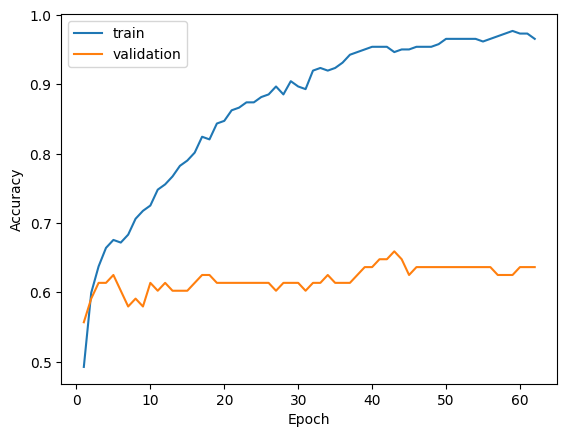

In [240]:
plt.plot(epoch, ac_train, label="train")
plt.plot(epoch, ac_val, label="validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [241]:
if 'loss' in history:
    train_loos = history['loss']
    val_loss = history['val_loss']

else:
    raise ValueError("History object doesn't contain accuracy record")

epoch = np.arange(len(ac_train)) + 1

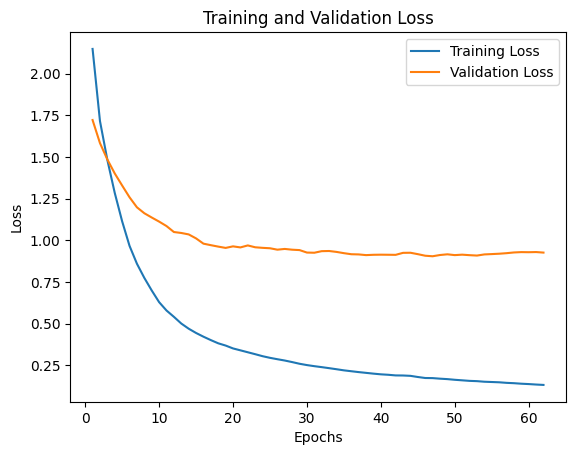

In [242]:
plt.plot(epoch, train_loos, label='Training Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xticks(arange(0, 21, 2))

# Display the plot
plt.legend(loc='best')
plt.show()

In [243]:
# Error de test del modelo final
# ==============================================================================
modelo_final = classifier_new
predicciones = modelo_final.predict(X = X_test)
fbeta_dt = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )

print(f"El error (fbeta) de test es: {fbeta_dt}")

3/3 [==============================] - 0s 4ms/step
El error (fbeta) de test es: 0.7342747111681643


In [244]:
# Error de test del modelo final
# ==============================================================================
modelo_final = classifier_new
predicciones = modelo_final.predict(X = X_test)
fbeta_adb = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1
       )

print(f"El error (fbeta) de test es: {fbeta_adb}")

3/3 [==============================] - 0s 4ms/step
El error (fbeta) de test es: 0.7272727272727273


In [245]:
# Error de test del modelo final
# ==============================================================================
modelo_final = classifier_new
predicciones = modelo_final.predict(X = X_test)
fbeta_adb = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=2
       )

print(f"El error (fbeta) de test es: {fbeta_adb}")

3/3 [==============================] - 0s 4ms/step
El error (fbeta) de test es: 0.738255033557047


In [246]:
modelo_final = classifier_new
predicciones = modelo_final.predict(X = X_test)
fbeta_dt = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=0.5
       )

print(f"El error (fbeta) de test es: {fbeta_dt}")

3/3 [==============================] - 0s 4ms/step
El error (fbeta) de test es: 0.7166123778501629


In [247]:
modelo_final = classifier_new
predicciones = modelo_final.predict(X = X_test)
fbeta_dt = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=0
       )

print(f"El error (fbeta) de test es: {fbeta_dt}")

3/3 [==============================] - 0s 4ms/step
El error (fbeta) de test es: 0.7096774193548387


In [248]:
y_pred = modelo_final.predict(X_test)
print(classification_report(y_test, y_pred))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.42      0.38      0.40        29
         1.0       0.71      0.75      0.73        59

    accuracy                           0.62        88
   macro avg       0.57      0.56      0.56        88
weighted avg       0.62      0.62      0.62        88



In [249]:
y_scores = classifier_new.predict_proba(X_test)[:, 1]
print(average_precision_score(y_test, y_scores, average='macro'))

3/3 [==============================] - 0s 4ms/step
0.7423442029093071


In [250]:
print(y_scores)

[0.7727822  0.98871684 0.10186919 0.9996055  0.00982419 0.96022403
 0.58154273 0.9999894  0.9568512  0.99228144 0.998934   0.00520891
 0.8209922  0.30295524 0.9997281  0.9987232  0.99513793 0.4152595
 0.93354326 0.8801753  0.5542613  0.901313   0.47021306 0.06145228
 0.9202013  0.5057586  0.9605946  0.9818001  0.9609195  0.6724849
 0.9892629  0.5595563  0.24105734 0.9998841  0.01070592 0.01819131
 0.9095184  0.9846235  0.7748772  0.9624595  0.99990743 0.20300856
 0.998328   0.38054836 0.97469556 0.99593717 0.97860116 0.3068695
 0.77057236 0.9913977  0.6842102  0.3317451  0.45868155 0.8991115
 0.7243807  0.93345183 0.5277758  0.04616031 0.9921167  0.6097074
 0.9999161  0.41277814 0.90245855 0.8124012  0.7416789  0.9603007
 0.27849254 0.99988234 0.55933    0.9644216  0.97164327 0.9799259
 0.954524   0.62717915 0.9434763  0.8204224  0.46300465 0.91719455
 0.00319158 0.98469007 0.46158978 0.00445224 0.04747652 0.3200007
 0.98416966 0.87617093 0.20774396 0.11379807]


In [251]:
ndcg = ndcg_score(y_test.values.reshape(1, -1), [y_scores])
print(f"NDCG Score: {ndcg:.4f}")

NDCG Score: 0.8949


Text(0.5, 427.9555555555555, 'Predicted label')

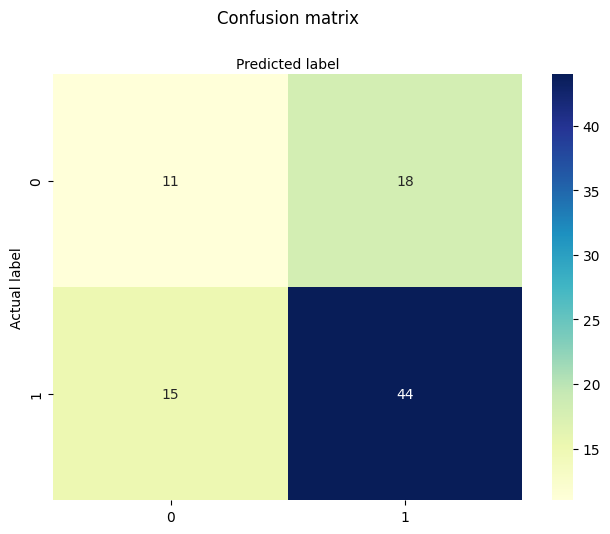

In [252]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, pred_new2)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

###Roc Curve

In [253]:
# Predict probabilities for the test set
y_pred_probs = classifier_new.predict_proba(X_test)[:, 1]

3/3 [==============================] - 0s 4ms/step


In [254]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)


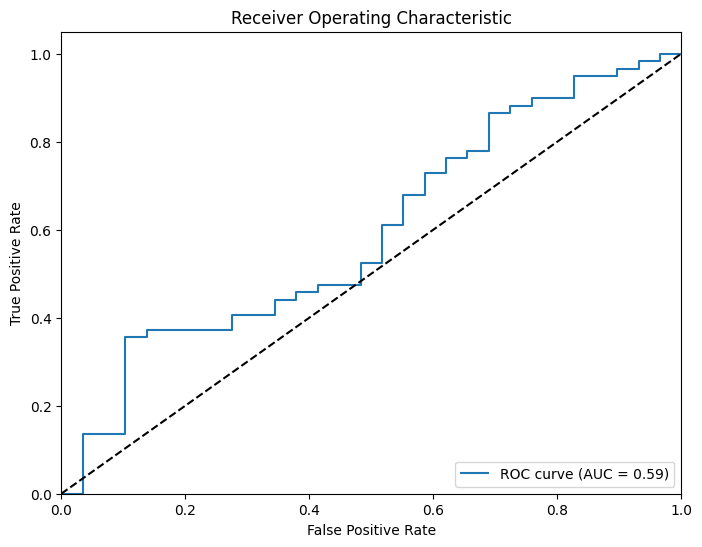

ROC AUC score: 0.5949736995908825


In [255]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC AUC score
print("ROC AUC score:", roc_auc)